# <center>"Mini Project 02"</center>

## Plotting United_States_COVID-19_Cases_and_Deaths_by_State_over_Time with best fit curves.

Objective:

- EDA 
- Curve Fitting

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
csv_data_path = "C:/Users/Nikki/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv"
#csv file
covid19 = pd.read_csv(csv_data_path)               #importing csv file
df = pd.DataFrame(covid19)  
#build up the pandas dataframe
print(df.columns)  

Index(['submission_date', 'state', 'tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death', 'created_at', 'consent_cases',
       'consent_deaths'],
      dtype='object')


In [3]:
df

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/14/2022,KS,"621,273","470,516","150,757","19,414","6,964","7,162",NaN,NaN,21,4,01/15/2022 02:59:30 PM,Agree,NaN
1,01/02/2022,AS,11,NaN,NaN,0,0,0,NaN,NaN,0,0,01/03/2022 03:18:16 PM,NaN,NaN
2,02/04/2020,AR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
3,12/06/2021,MP,"1,104","1,104",0,0,0,5,5,0,2,0,12/08/2021 12:00:00 AM,Agree,Agree
4,05/09/2021,PW,0,NaN,NaN,0,0,0,NaN,NaN,0,0,05/10/2021 02:15:36 PM,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50356,05/28/2020,IA,"18,585",NaN,NaN,228,0,506,NaN,NaN,14,0,05/29/2020 02:19:55 PM,Not agree,Not agree
50357,06/07/2020,SD,"5,438",NaN,NaN,71,0,65,64,1,0,1,06/08/2020 02:55:08 PM,NaN,Agree
50358,04/30/2021,SD,"122,660",NaN,NaN,128,17,"1,967","1,601",366,5,1,05/01/2021 01:43:22 PM,NaN,Agree
50359,04/06/2020,NM,686,NaN,NaN,62,0,12,NaN,NaN,0,0,04/08/2020 12:00:00 AM,NaN,Not agree


In [4]:
df.shape

(50361, 15)

In [7]:
df.head

<bound method NDFrame.head of       submission_date state tot_cases conf_cases prob_cases new_case  \
0          01/14/2022    KS   621,273    470,516    150,757   19,414   
1          01/02/2022    AS        11        NaN        NaN        0   
2          02/04/2020    AR         0        NaN        NaN        0   
3          12/06/2021    MP     1,104      1,104          0        0   
4          05/09/2021    PW         0        NaN        NaN        0   
...               ...   ...       ...        ...        ...      ...   
50356      05/28/2020    IA    18,585        NaN        NaN      228   
50357      06/07/2020    SD     5,438        NaN        NaN       71   
50358      04/30/2021    SD   122,660        NaN        NaN      128   
50359      04/06/2020    NM       686        NaN        NaN       62   
50360      03/13/2021    IA   342,495        NaN        NaN      425   

      pnew_case tot_death conf_death prob_death new_death pnew_death  \
0         6,964     7,162        

In [8]:
df.columns

Index(['submission_date', 'state', 'tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death', 'created_at', 'consent_cases',
       'consent_deaths'],
      dtype='object')

In [9]:
df.info

<bound method DataFrame.info of       submission_date state tot_cases conf_cases prob_cases new_case  \
0          01/14/2022    KS   621,273    470,516    150,757   19,414   
1          01/02/2022    AS        11        NaN        NaN        0   
2          02/04/2020    AR         0        NaN        NaN        0   
3          12/06/2021    MP     1,104      1,104          0        0   
4          05/09/2021    PW         0        NaN        NaN        0   
...               ...   ...       ...        ...        ...      ...   
50356      05/28/2020    IA    18,585        NaN        NaN      228   
50357      06/07/2020    SD     5,438        NaN        NaN       71   
50358      04/30/2021    SD   122,660        NaN        NaN      128   
50359      04/06/2020    NM       686        NaN        NaN       62   
50360      03/13/2021    IA   342,495        NaN        NaN      425   

      pnew_case tot_death conf_death prob_death new_death pnew_death  \
0         6,964     7,162      

In [10]:
df.describe

<bound method NDFrame.describe of       submission_date state tot_cases conf_cases prob_cases new_case  \
0          01/14/2022    KS   621,273    470,516    150,757   19,414   
1          01/02/2022    AS        11        NaN        NaN        0   
2          02/04/2020    AR         0        NaN        NaN        0   
3          12/06/2021    MP     1,104      1,104          0        0   
4          05/09/2021    PW         0        NaN        NaN        0   
...               ...   ...       ...        ...        ...      ...   
50356      05/28/2020    IA    18,585        NaN        NaN      228   
50357      06/07/2020    SD     5,438        NaN        NaN       71   
50358      04/30/2021    SD   122,660        NaN        NaN      128   
50359      04/06/2020    NM       686        NaN        NaN       62   
50360      03/13/2021    IA   342,495        NaN        NaN      425   

      pnew_case tot_death conf_death prob_death new_death pnew_death  \
0         6,964     7,162    

In [11]:
#finding out total number of null values in each column.
df.isnull().sum()

submission_date        0
state                  0
tot_cases              0
conf_cases         22476
prob_cases         22548
new_case               0
pnew_case           3702
tot_death              0
conf_death         22913
prob_death         22913
new_death              0
pnew_death          3670
created_at             0
consent_cases       8395
consent_deaths      7551
dtype: int64

### Sub-dataframe for storing only the values for the California

In [12]:
#initialize a sub-dataframe for storing only the values for the California
df_CA = df[df['state'] == 'CA']

In [13]:
df_CA

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
10539,12/12/2021,CA,"5,133,238","4,867,604","265,634",0,0,"74,509",NaN,NaN,0,0,12/13/2021 03:27:15 PM,Agree,Not agree
10541,02/28/2022,CA,"8,960,997","8,381,196","579,801","19,492",0,"84,700",NaN,NaN,708,0,03/01/2022 03:28:54 PM,Agree,Not agree
10564,09/15/2021,CA,"4,574,136","4,380,566","193,570","7,760",0,"67,001","67,001",0,188,0,09/17/2021 12:00:00 AM,Agree,Agree
10676,06/11/2021,CA,"3,694,498","3,694,498",0,"1,136",0,"62,593","62,593",0,55,0,06/13/2021 12:00:00 AM,Agree,Agree
10683,06/08/2021,CA,"3,691,660","3,691,660",0,792,0,"62,479","62,479",0,6,0,06/10/2021 12:00:00 AM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34707,12/24/2021,CA,"5,264,182","4,990,016","274,166","20,401",0,"75,461",NaN,NaN,78,0,12/25/2021 02:11:33 PM,Agree,Not agree
34719,01/28/2022,CA,"8,213,786","7,706,395","507,391","76,729",0,"78,825",NaN,NaN,254,0,01/29/2022 02:30:49 PM,Agree,Not agree
34765,10/09/2020,CA,"838,606","838,606",0,"3,806",0,"16,298","16,298",0,73,0,10/11/2020 12:00:00 AM,Agree,Agree
34778,08/29/2020,CA,"693,839","693,839",0,"4,981",0,"12,569","12,569",0,108,0,08/31/2020 12:00:00 AM,Agree,Agree


In [14]:
df_CA.describe()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
count,839,839,839,839,839,839,839,839,634,634,839,839,839,839,839
unique,839,1,719,719,41,694,40,689,574,1,288,1,835,1,2
top,12/12/2021,CA,0,0,0,0,0,0,0,0,0,0,03/07/2022 05:06:37 PM,Agree,Agree
freq,1,839,11,11,533,121,800,43,31,634,149,839,5,839,634


In [15]:
df_CA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839 entries, 10539 to 34805
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   submission_date  839 non-null    object
 1   state            839 non-null    object
 2   tot_cases        839 non-null    object
 3   conf_cases       839 non-null    object
 4   prob_cases       839 non-null    object
 5   new_case         839 non-null    object
 6   pnew_case        839 non-null    object
 7   tot_death        839 non-null    object
 8   conf_death       634 non-null    object
 9   prob_death       634 non-null    object
 10  new_death        839 non-null    object
 11  pnew_death       839 non-null    object
 12  created_at       839 non-null    object
 13  consent_cases    839 non-null    object
 14  consent_deaths   839 non-null    object
dtypes: object(15)
memory usage: 104.9+ KB


In [16]:
df_CA.isnull().sum()

submission_date      0
state                0
tot_cases            0
conf_cases           0
prob_cases           0
new_case             0
pnew_case            0
tot_death            0
conf_death         205
prob_death         205
new_death            0
pnew_death           0
created_at           0
consent_cases        0
consent_deaths       0
dtype: int64

In [17]:
#an array with the total no. of cases
tot_cases = np.array((df_CA['tot_cases']))

In [18]:
# array containing the no. of days from the first recording
days = np.linspace(0, len(tot_cases), len(tot_cases))

In [19]:
tot_cases

array(['5,133,238', '8,960,997', '4,574,136', '3,694,498', '3,691,660',
       '9,084,834', '739,527', '4,885,289', '4,653,610', '586,056',
       '122,901', '9,105,181', '5,041,193', '5,084,927', '1,389,707',
       '9,140,562', '26,182', '3,553,307', '12,026', '4,429,964',
       '2,781,039', '538,416', '4,276,720', '3,484,963', '10,566',
       '3,656,967', '23,253', '3,555,915', '9,115,022', '3,677,235', '6',
       '3,661,675', '8,775,930', '944,576', '4,653,610', '7,570,538',
       '3,465,726', '4,676,579', '247', '722,283', '5,844,204',
       '4,826,113', '904,198', '4,554,525', '3,559,193', '5,264,182',
       '5,204,695', '3,428,518', '760,013', '4,749,201', '1,286,557',
       '514,901', '4,972,469', '1,854,456', '3,659,641', '9,155,320',
       '8,867,026', '312,344', '3,294,447', '6', '165,416', '4,515,931',
       '4,355,018', '485,502', '8,545,237', '3,085,040', '133',
       '8,941,505', '4,466,363', '991,609', '3,688,893', '4,497,019',
       '4,382,003', '6', '8,987,

In [20]:
days

array([  0.        ,   1.00119332,   2.00238663,   3.00357995,
         4.00477327,   5.00596659,   6.0071599 ,   7.00835322,
         8.00954654,   9.01073986,  10.01193317,  11.01312649,
        12.01431981,  13.01551313,  14.01670644,  15.01789976,
        16.01909308,  17.0202864 ,  18.02147971,  19.02267303,
        20.02386635,  21.02505967,  22.02625298,  23.0274463 ,
        24.02863962,  25.02983294,  26.03102625,  27.03221957,
        28.03341289,  29.03460621,  30.03579952,  31.03699284,
        32.03818616,  33.03937947,  34.04057279,  35.04176611,
        36.04295943,  37.04415274,  38.04534606,  39.04653938,
        40.0477327 ,  41.04892601,  42.05011933,  43.05131265,
        44.05250597,  45.05369928,  46.0548926 ,  47.05608592,
        48.05727924,  49.05847255,  50.05966587,  51.06085919,
        52.06205251,  53.06324582,  54.06443914,  55.06563246,
        56.06682578,  57.06801909,  58.06921241,  59.07040573,
        60.07159905,  61.07279236,  62.07398568,  63.07

In [21]:
len(tot_cases)

839

In [22]:
len(days)

839

In [23]:
d = {
    "days": pd.Series(days, index=None),
    "tot_cases": pd.Series(tot_cases, index=None),
}

In [24]:
d

{'days': 0        0.000000
 1        1.001193
 2        2.002387
 3        3.003580
 4        4.004773
           ...    
 834    834.995227
 835    835.996420
 836    836.997613
 837    837.998807
 838    839.000000
 Length: 839, dtype: float64,
 'tot_cases': 0      5,133,238
 1      8,960,997
 2      4,574,136
 3      3,694,498
 4      3,691,660
          ...    
 834    5,264,182
 835    8,213,786
 836      838,606
 837      693,839
 838    5,947,810
 Length: 839, dtype: object}

In [25]:
#columns=["tot_cases", "days"])
df2 = pd.DataFrame(d)                           
df2

,days,tot_cases
0,0.000000,"5,133,238"
1,1.001193,"8,960,997"
2,2.002387,"4,574,136"
3,3.003580,"3,694,498"
4,4.004773,"3,691,660"
...,...,...
834,834.995227,"5,264,182"
835,835.996420,"8,213,786"
836,836.997613,"838,606"
837,837.998807,"693,839"


In [26]:
df2["tot_cases"] = df2['tot_cases'].str.replace(',', '').astype(float)
df2["tot_cases"]

0      5133238.0
1      8960997.0
2      4574136.0
3      3694498.0
4      3691660.0
         ...    
834    5264182.0
835    8213786.0
836     838606.0
837     693839.0
838    5947810.0
Name: tot_cases, Length: 839, dtype: float64

In [27]:
df2

,days,tot_cases
0,0.000000,5133238.0
1,1.001193,8960997.0
2,2.002387,4574136.0
3,3.003580,3694498.0
4,4.004773,3691660.0
...,...,...
834,834.995227,5264182.0
835,835.996420,8213786.0
836,836.997613,838606.0
837,837.998807,693839.0


In [28]:
df2["days"][:200]

0        0.000000
1        1.001193
2        2.002387
3        3.003580
4        4.004773
          ...    
195    195.232697
196    196.233890
197    197.235084
198    198.236277
199    199.237470
Name: days, Length: 200, dtype: float64

In [29]:
# The Fitting Function
def exp_fit(x, a, b, c):
    y = a * np.exp(b * x) + c
    return y

In [30]:
#Calling The Funtion
fit = curve_fit(exp_fit, df2["days"][:122], df2["tot_cases"][:122], p0 = [0.005, 0.03, 5])
fit_eq = fit[0][0]*np.exp(fit[0][1]*df2["days"][:122])+fit[0][2]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Plotting

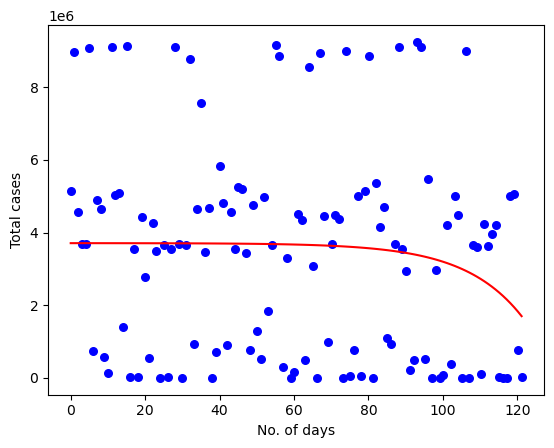

In [31]:

fig = plt.figure()
ax = fig.subplots()
ax.scatter(df2["days"][:122], df2["tot_cases"][:122], color = 'b', s = 30)
ax.plot(df2["days"][:122], fit_eq, color = 'r', alpha = 1)
ax.set_ylabel('Total cases')
ax.set_xlabel('No. of days')
plt.show()

## 2 APPLYING AN RANDOM EXPONENTIAL DISTRIBUTION FIT TO A HISTOGRAM

- Decaying Fit of the Distribution

In [32]:
#-----APPLY AN EXPONENTIAL FIT TO A HISTOGRAM--------
def exp_fit(x, a, b):
    y = a * np.exp(-b *x)#the point of the fit will be positioned at the center of the bins
    return y

In [34]:
#generating a random exponential distribution
data = np.random.exponential(5, size=10000)
#generating a histogram from the exponential distribution
hist = np.histogram(data, bins="auto")[0]
#generating an array that contains the coordinated of the left edge of each bar
x = np.arange(0, len(hist), 1)

In [35]:
#the point of the fit will be positioned at the center of the bins
x_fit = x + x[1]/2
# calling the fit function
fit = curve_fit(exp_fit, x_fit, hist)
# building the y-array of the fit
fit_eq = fit[0][0] * np.exp(-fit[0][1] * x_fit)

C:\Users\Nikki\AppData\Local\Temp\ipykernel_15300\585195870.py:2: RuntimeWarning: overflow encountered in exp
  y = a * np.exp(-b *x)#the point of the fit will be positioned at the center of the bins


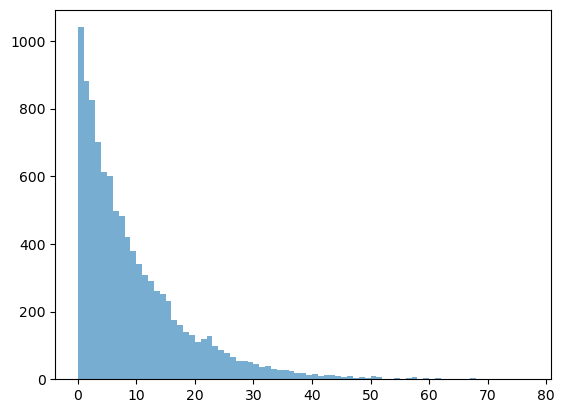

In [36]:
plt.bar(x, hist, alpha=0.6, align = 'edge', width = 1)
plt.show()

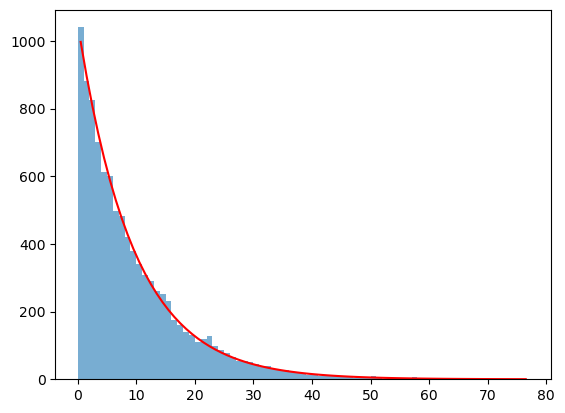

In [37]:
#Plotting
plt.bar(x,hist, alpha = 0.6, align = 'edge', width = 1)
plt.plot(x_fit,fit_eq, color = 'red')
plt.show()

## Conclusion

- Applying an random exponential distribution fit to a histogram. 
- We have learned how to fit postioned centre of the bins. Graph is plotted with align on the edges with color. Also we had learned how to fit best curves.
- We used pandas for biuld uping the Data Frame. We used arrays for total no. of cases. 
- We used fitting function and plotting

# Thank You!!